In [1]:
%load_ext autoreload
%autoreload 2

from Shared.shared import *
from Shared.specific_CNB_sim import *


sim_name = f"Dopri5_1k"
sim_folder = f"sim_output/{sim_name}"
nu_mass_range = jnp.load(f"{sim_folder}/neutrino_massrange_eV.npy")

# Simulation parameters.
with open(f'{sim_folder}/sim_parameters.yaml', 'r') as file:
    sim_setup = yaml.safe_load(file)
Nside = sim_setup["Nside"]
Npix = sim_setup["Npix"]
nu_per_pix = sim_setup["momentum_num"]
pix_sr = sim_setup["pix_sr"]

exclude_nums = [
    20,  # broken halo
    25,  #? halo with only underdensities? look at skymap for this one...
]

## Overdensity band

In [ ]:
tot_dens_halos = jnp.load(f"{sim_folder}/total_densities.npy")
ic(tot_dens_halos.shape)

SimPlot.overdensity_band(
    dens_arr=tot_dens_halos,
    m_arr=nu_mass_range,
    plot_ylims=(1e-4,1e1),
    fig_path=f"figures/overdensity_band_{sim_name}.pdf",
    args=Params())

## Anisotropy Skymaps and Power Spectra

In [6]:
nu_vectors = jnp.load(f"{sim_folder}/vectors_halo1.npy")
ic(nu_vectors.shape)

nu_dens = Physics.number_densities_all_sky(
    v_arr=nu_vectors[..., 3:],
    m_arr=nu_mass_range,
    pix_sr=pix_sr,
    args=Params())
ic(nu_dens.shape)

ic| nu_vectors.shape: (768, 1000, 2, 6)
ic| nu_dens.shape: (50, 768)


(50, 768)

ic| CNB_dens_1mass.shape: (768,)
ic| CNB_dens_1mass.min(): Array(0.03622775, dtype=float64)
    CNB_dens_1mass.max(): Array(0.57511279, dtype=float64)
/home/fzimmer/.conda/envs/neutrino_clustering/lib/python3.10/site-packages/healpy/newvisufunc.py:407: UserWarning: 
 *** Overriding default plot properies: {'cbar_shrink': 0.6, 'cbar_pad': 0.05, 'cbar_label_pad': 0, 'cbar_tick_direction': 'out', 'vertical_tick_rotation': 90, 'figure_width': 8.5, 'figure_size_ratio': 0.63} ***
  warnings.warn(
/home/fzimmer/.conda/envs/neutrino_clustering/lib/python3.10/site-packages/healpy/newvisufunc.py:411: UserWarning: 
 *** New plot properies: {'cbar_shrink': 0.6, 'cbar_pad': 0.1, 'cbar_label_pad': 0, 'cbar_tick_direction': 'out', 'vertical_tick_rotation': 90, 'figure_width': 8.5, 'figure_size_ratio': 0.63} ***
  warnings.warn("\n *** New plot properies: " + str(plot_properties) + " ***")
/home/fzimmer/.conda/envs/neutrino_clustering/lib/python3.10/site-packages/healpy/newvisufunc.py:407: UserWarning

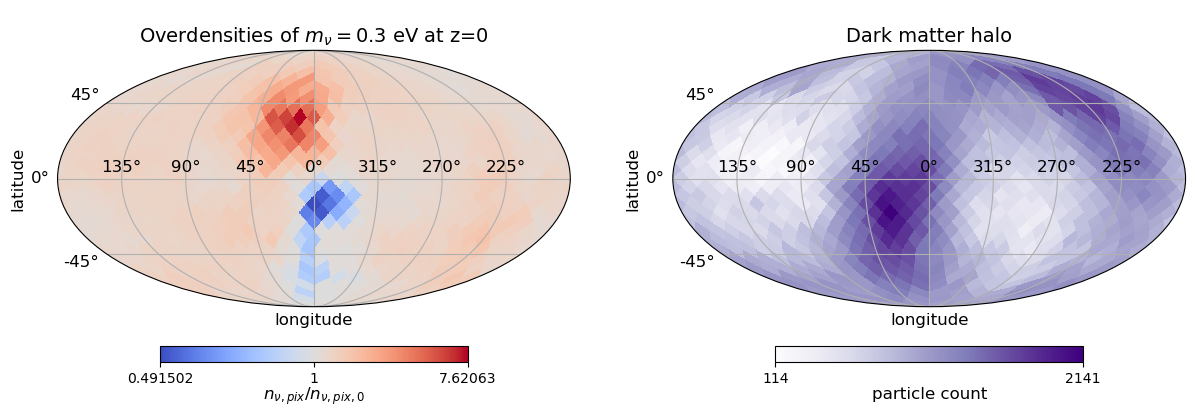

(Array([1.46735493, 1.51687149, 1.46577197, 1.64898242, 1.80796623,
        1.71923117, 1.68870386, 1.53003058, 1.42572122, 1.32468316,
        1.67165043, 1.89131231, 2.08962322, 2.06120826, 2.00787993,
        1.33119747, 1.67080514, 1.50906664, 1.42074256, 1.43462275,
        1.49182659, 1.69830859, 1.88262055, 2.32332197, 2.83067933,
        2.41254609, 2.07892365, 1.92097493, 1.8124548 , 1.45814833,
        1.66283303, 1.52903067, 1.24718653, 1.39432783, 1.45888988,
        1.5546999 , 1.69686212, 1.97076006, 2.14806727, 2.59695673,
        4.27895012, 3.37239634, 2.90614086, 2.15706573, 2.00054232,
        1.78563911, 1.75050488, 1.47064309, 1.40346347, 1.48396914,
        1.41347491, 1.32666767, 1.35415435, 1.47335859, 1.66661945,
        1.7573257 , 1.99336591, 2.01200814, 2.24548838, 2.67885247,
        3.62462872, 4.33986585, 3.68085071, 2.77415166, 2.19409643,
        1.89391877, 1.85410227, 1.77258589, 1.74868744, 1.70643631,
        1.65917777, 1.52796548, 1.46260558, 1.38

In [10]:
# Choose which halo to plot
halo_i = 1

# Load associated origID of chosen halo
halo_indices = jnp.load(
    f"{sim_folder}/halo_batch_0.6-2.0x1e+12.0_Msun_indices.npy")
haloID = halo_indices[halo_i-1]

# Choose which neutrino mass to plot
m_val = 0.3
nu_mass_range = jnp.load(f"{sim_folder}/neutrino_massrange_eV.npy")
m_idx = jnp.abs(nu_mass_range - m_val).argmin()

# Load corresponding number densities
CNB_dens_1mass = nu_dens[m_idx]
ic(CNB_dens_1mass.shape)
ic(CNB_dens_1mass.min(), CNB_dens_1mass.max())

CNB_skymap, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val, 
    CNB_dens=CNB_dens_1mass, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_path=f"figures/skymaps_CNBxDM_{sim_name}.pdf",
    args=Params())